In [ ]:
라이브러리 임포트

In [16]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show
from skimage import color, viewer, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import random_noise
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy import misc

In [ ]:
numpy 배열 슬라이싱으로 영상 조작

[180  76  83]


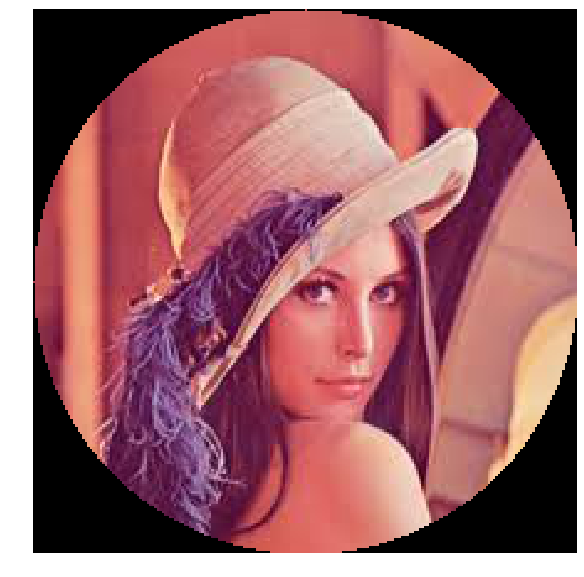

In [14]:
lena = imread("../images/lena.jpg")	# 영상 읽기(numpy ndarray)
print(lena[0, 40]) # [180 76 83]
# print(lena[10:13, 20:23,0:1]) 			# 행렬 범위 슬라이딩

lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
lena[mask, :] = 0

plt.figure(figsize=(10,10))
plt.imshow(lena), plt.axis('off')
plt.show()

In [ ]:
간단한 영상 모핑 - 교차 디졸브를 사용하는 두 영상의 알파 블렌딩

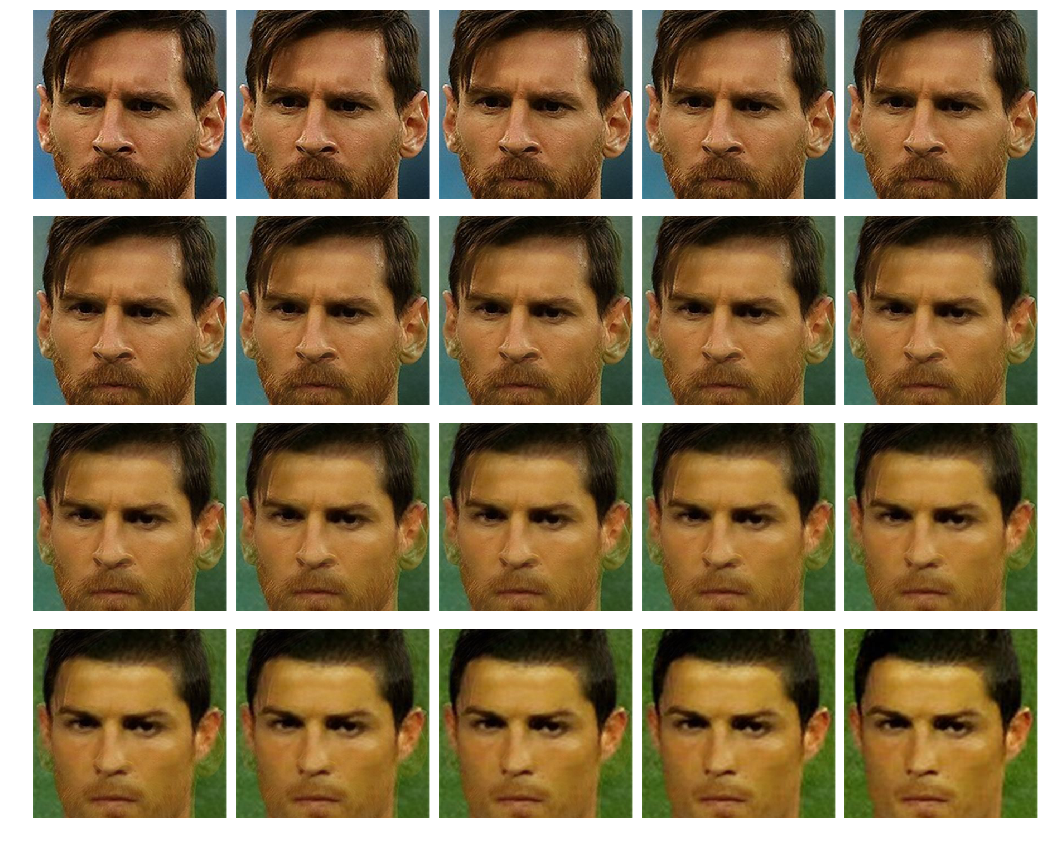

In [17]:
im1 = mpimg.imread("../images/messi.jpg") / 255  		# RGB 값을 [0,1]로 조정
im2 = mpimg.imread("../images/ronaldo.jpg") / 255
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0, 1, 20):
    plt.subplot(4,5,i)
    plt.imshow((1-alpha)*im1 + alpha*im2)
    plt.axis('off')
    i += 1
    
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
PIL을 이용한 영상 조작

In [18]:
im = Image.open("../images/parrot.png") 		 # 영상 열기, 경로 주의
print(im.width, im.height, im.mode, im.format) 	 # 영상 정보 출력 -486 362 RGB PNG

453 340 RGB PNG


In [ ]:
영상 자르기

In [19]:
im = Image.open("../images/parrot.png")		# 영상 열기, 경로 주의
print(im.width, im.height, im.mode, im.format) # 영상 정보 출력 - 486 362 RGB PNG

im_c = im.crop((175,75,320,200))		# 사각형 정보(left, top, right, bottom)로 영상 절단
im_c.show() 		 		 			# 윈도우의 사진보기 프로그램에 표시

453 340 RGB PNG


In [ ]:
영상 크기 조정 - 확대

In [20]:
im = Image.open("../images/clock.jpg")
print(im.width, im.height)		  # 107 105
im.show()

107 105


In [21]:
im_large = im.resize((im.width*5, im.height*5), Image.BILINEAR) # 양선형 보간
im_large.show()

In [ ]:
크기 변경 - 축소

In [23]:
im = Image.open("../images/victoria_memorial.png")
print(im.width, im.height) 		 # 720 540
im.show()

720 540


In [ ]:
im_small = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)

In [24]:
영상 반전

In [25]:
im = Image.open("../images/parrot.png")
im_t = im.point(lambda x: 255 - x)
im_t.show()

In [ ]:
영상을 명암도로 변환

In [26]:
im_g = im.convert('L') # 컬러 영상 --> 명암도 영상
im_g.show()

In [ ]:
로그 변환

In [27]:
im_g.point(lambda x: 255*np.log(1+x/255)).show()

In [ ]:
파워-로우 변환

In [28]:
im_g.point(lambda x: 255*(x/255)**0.6).show()

In [ ]:
기하학적 변환 - 영상 반사

In [29]:
im.transpose(Image.FLIP_LEFT_RIGHT).show() # 수직 축을 기준으로 반사

In [ ]:
영상 회전

In [30]:
im_45 = im.rotate(45) # 45도 영상 회전
im_45.show() # 회전 영상 표시

In [ ]:
영상에 어파인 변환 적용

In [31]:
size = (int(1.4*im.width), im.height)
im.transform(size, Image.AFFINE, data=(1,-0.5,0,0,1,0)).show() # shear(전단)

In [ ]:
원근 변환

In [32]:
params = [1, 0.1, 0, -0.1, 0.5, 0, -0.005, -0.001]
size = (im.width//3, im.height)
im1 = im.transform(size, Image.PERSPECTIVE, params, Image.BICUBIC)
im1.show()

In [ ]:
영상의 화소 값 변경 - 소금 후추 잡음 추가

In [33]:
im1 = im.copy()  					# 복제를 통해 원본 영상 유지
n = 5000  							# 영상내에 5,000개 랜덤 좌표 선택
x = np.random.randint(0, im.width, n)
y = np.random.randint(0, im.height,n)

for (x,y) in zip(x,y):
    new_pix = (0,0,0) if np.random.rand() < 0.5 else (255,255,255)
    im1.putpixel((x, y), new_pix )	# 소금 후추 잡음 추가
im1.show()

In [ ]:
영상에 그리기

In [34]:
im = Image.open("../images/parrot.png")
draw = ImageDraw.Draw(im)
draw.ellipse((125, 125, 200, 250), fill=(255,255,255,128))
del draw
im.show()

In [ ]:
영상에 글자 쓰기

In [35]:
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("arial.ttf", 23) # use a truetype font
draw.text((10, 5), "Welcome to image processing with python", font=font)
del draw
im.show()

In [ ]:
섬네일 생성

In [36]:
im = Image.open("../images/parrot.png")
im_thumbnail = im.copy() # 원본 영상 복제
im_thumbnail.thumbnail((100,100)) # 영상에 섬네일 붙이기
im_thumbnail.show()

In [ ]:
기본 통계 계산

In [37]:
s = stat.Stat(im)
print(s.extrema)	# R, G, B 각 채널의 최댓값, 최소값 [(4, 255), (0, 255), (0, 253)]
print(s.count) 		# [154020, 154020, 154020]
print(s.mean) 		# [125.41716010907675, 124.4158940397351, 68.46314764316323]
print(s.median)		# [117, 128, 63]
print(s.stddev)		# [47.763871467000165, 51.19863631276633, 39.29534599039047]

[(0, 255), (0, 255), (0, 253)]
[154020, 154020, 154020]
[125.41716010907675, 124.4158940397351, 68.46314764316323]
[117, 128, 63]
[47.763871467000165, 51.19863631276633, 39.29534599039047]


In [ ]:
RGB 채널에 대한 화소 값 히스토그램 그리기

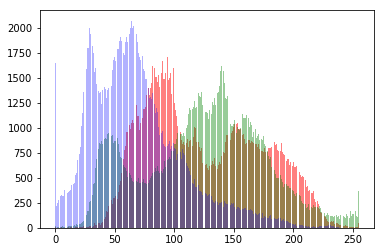

In [38]:
pl = im.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

In [ ]:
RGB 채널 분리

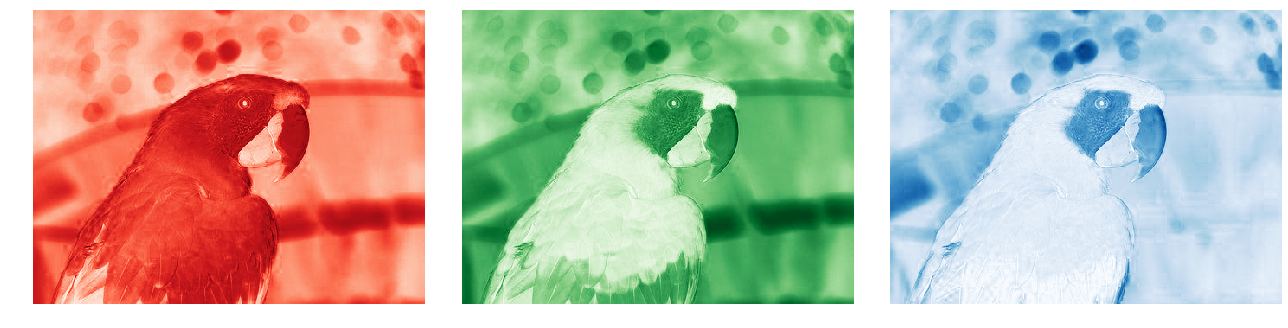

In [39]:
ch_r, ch_g, ch_b = im.split()	# 3개 채널(Red, Green, Blue) 분리
# matplotlib를 사용하여 각 채널 영상 표시
plt.figure(figsize=(18,6))
plt.subplot(1,3,1), plt.imshow(ch_r, cmap='Reds'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(ch_g, cmap='Greens'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(ch_b, cmap='Blues'), plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
다중 채널 결합

In [40]:
im = Image.merge('RGB', (ch_b, ch_g, ch_r)) # red, blue 채널 바꿔 채널 합성
im.show()

In [ ]:
α-블렌딩

In [41]:
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png") 		# 453 340 1280 960 RGBA

im1 = im1.convert('RGBA') 					# 두 영상 컬러 모드 다름, 같은 모드 변경
im2 = im2.resize((im1.width, im1.height), Image.BILINEAR) # 두 영상 크기 같게함
im = Image.blend(im1, im2, alpha=0.5).show()

In [ ]:
두 영상 겹치기

In [42]:
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png")
im2 = im2.convert('RGB').resize((im1.width,im1.height))
multiply(im1, im2).show()

In [ ]:
두 영상 더하기

In [43]:
add(im1, im2).show()

In [ ]:
두 영상 차분 계산

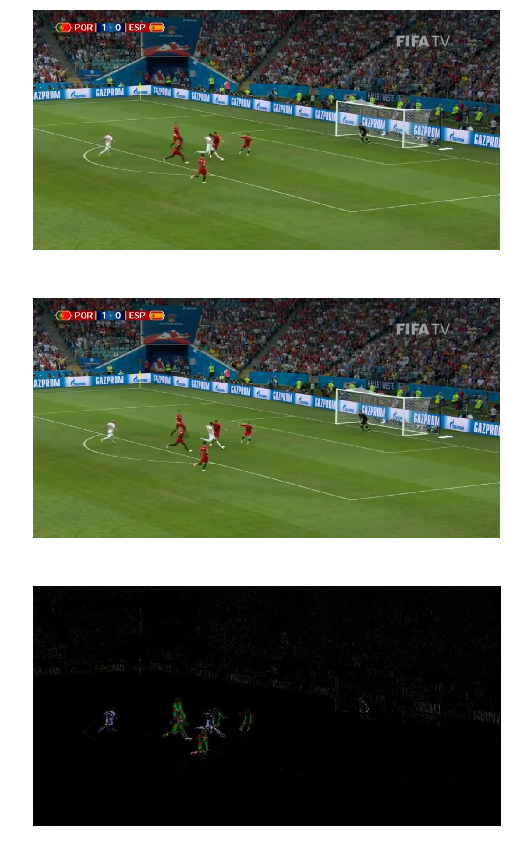

In [44]:
from PIL.ImageChops import subtract, multiply, screen, difference, add

im1 = Image.open("../images/goal1.png")
im2 = Image.open("../images/goal2.png")
im = difference(im1, im2)

im.save("../images/goal_diff.png")
plt.figure(figsize=(18,15))
plt.subplot(311), plt.imshow(im1), plt.axis('off')
plt.subplot(312), plt.imshow(im2), plt.axis('off')
plt.subplot(313), plt.imshow(im), plt.axis('off')
plt.show()